In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Score_assignment
import Score_cluster
import Score_physics
from Plotting import *

from scipy.optimize import curve_fit

In [2]:
df = pd.read_csv("result_truth.csv")

In [3]:
ievent = 0
iparticle=6
itrack =5

df_event=df.loc[df['event']==ievent]
df_particle=df_event[df['particle']==iparticle]
df_track=df_event[df['track']==itrack]

/Library/Python/2.7/site-packages/pandas/core/frame.py:1686: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [4]:
df_event

,Unnamed: 0,event,particle,track,hit,x,y
0,0,0,0,0,20,-4.279116,3.125760
1,1,0,0,0,40,-8.049544,6.430402
2,2,0,0,0,60,-11.885345,9.659012
3,3,0,0,0,80,-15.784986,12.810297
4,4,0,0,0,100,-19.746907,15.882994
5,5,0,0,0,120,-23.769527,18.875874
6,6,0,0,0,140,-27.851236,21.787738
7,7,0,0,0,160,-31.990404,24.617418
8,8,0,0,0,180,-36.185376,27.363783
9,9,0,0,0,200,-40.434475,30.025731


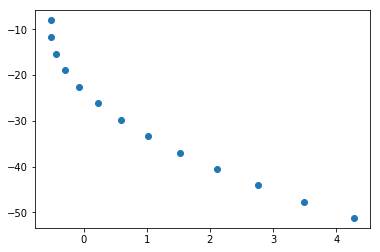

In [5]:
x=df_track['x'].values
y=df_track['y'].values

plt.scatter(x,y)
plt.show()

In [6]:
x,y

(array([-0.51643181, -0.51381024, -0.43859625, -0.29081848, -0.07053458,
         0.22216879,  0.58717599,  1.02434247,  1.53349482,  2.11443081,
         2.76691951,  3.49070137,  4.28548831]),
 array([ -8.03604995, -11.66590266, -15.2950133 , -18.92193022,
        -22.54520266, -26.16338127, -29.77501871, -33.37867023,
        -36.97289424, -40.5562529 , -44.12731268, -47.68464495, -51.22682652]))

In [7]:
def rotateToQuadrant(x,y):
    seedx=x[1]-x[0]
    seedy=y[1]-y[0]
    phi0=np.arctan2(y[0],x[0])
    phi1=np.arctan2(seedy,seedx)
    phi=phi1
    c, s = np.cos(-phi), np.sin(-phi)
    xr=c*x-s*y
    yr=s*x+c*y
    print phi
    return xr,yr

def func(x, r, vx, vy):
    return r - np.sqrt(r**2-(x-vx)**2) + vy


from formulate import *



p[0]x+p[1]x+p[2]x+x


-1.57007410199


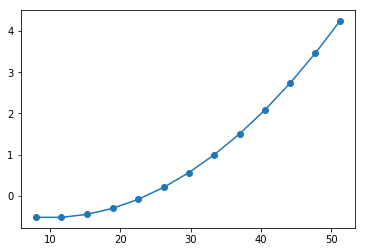

In [8]:
xr,yr=rotateToQuadrant(x,y)
plt.scatter(xr,yr)
plt.plot(xr,yr)
plt.show()

In [9]:
popt, pcov = curve_fit(func, xr, yr, p0=[200.,0.,0.], bounds=([5.,-25.,-25.], [1000., 25, 25]))

In [10]:
popt

array([ 181.50577883,    9.85019937,   -0.53131378])

In [11]:
x,y

(array([-0.51643181, -0.51381024, -0.43859625, -0.29081848, -0.07053458,
         0.22216879,  0.58717599,  1.02434247,  1.53349482,  2.11443081,
         2.76691951,  3.49070137,  4.28548831]),
 array([ -8.03604995, -11.66590266, -15.2950133 , -18.92193022,
        -22.54520266, -26.16338127, -29.77501871, -33.37867023,
        -36.97289424, -40.5562529 , -44.12731268, -47.68464495, -51.22682652]))

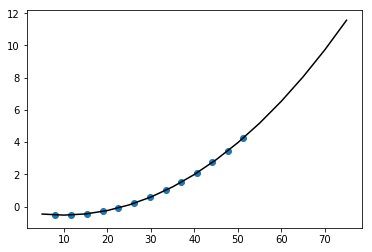

In [12]:
xp=np.arange(5.,80.,5.)
plt.plot(xp,func(xp,popt[0],popt[1],popt[2]),'k')
plt.scatter(xr,yr)
plt.show()

In [13]:
popt

array([ 181.50577883,    9.85019937,   -0.53131378])